### Question 5 from Assignment: RegressionProblems
#### Done by - Vedant Choudhary, vc389


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import sqrt

In [41]:
# Global variables 
m, w, b, sigma_square = 200, 1, 5, 0.1

# Creating data
def create_data(m, w, b, sigma_square):
    x = [0]*m
    x_minus = [0]*m
    y = [0]*m

    for i in range(m):
        x[i] = np.random.uniform(low=100, high=102)
        x_minus[i] = x[i] - 101
        y[i] = x[i]*w + b + np.random.normal(loc=0, scale=sqrt(sigma_square))
        
    return x, y, x_minus

In [42]:
# Plotting x and y data points
def plot(x, y):
    fig = plt.figure(figsize=(8,6))
    plt.scatter(x, y)
    plt.title("Dataset")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
def plot_line(x, w, b):
    temp = np.linspace(min(x), max(x), 100)
    temp_y = [temp[i]*w + b for i in range(len(temp))]
    fig = plt.figure(figsize=(8,6))
    plt.scatter(x, y)
    plt.plot(temp, temp_y, color='g')
    plt.title("Predicted Line")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

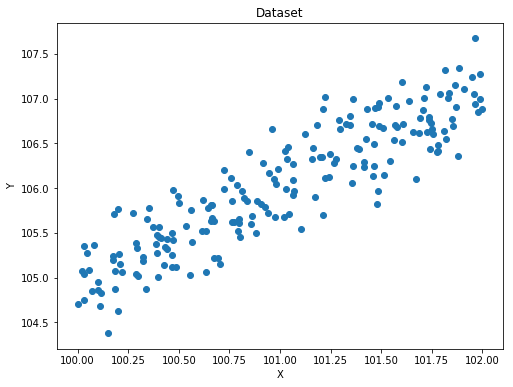

In [43]:
x, y, x_minus = create_data(m, w, b, sigma_square)

plot(x, y)

In [44]:
def calculate_w_b(x, y, m):
    e_xy = [x[i]*y[i] for i in range(m)]
    w = (np.mean(e_xy) - np.mean(x)*np.mean(y))/np.var(x)
    b = np.mean(y) - w*np.mean(x)
    
    return w, b

In [45]:
def multiple_runs(m):
    runs = 1000
    expected_w = []
    expected_b = []
    expected_w_m = []
    expected_b_m = []
    for i in tqdm(range(runs)):
        x, y, x_minus = create_data(m, w, b, sigma_square)
        w_pred, b_pred = calculate_w_b(x, y, m)
        w_pred_minus, b_pred_minus = calculate_w_b(x_minus, y, m)
        expected_w.append(w_pred)
        expected_b.append(b_pred)
        expected_w_m.append(w_pred_minus)
        expected_b_m.append(b_pred_minus)
        
    print("Expected values: Actual: w = {} : b = {}".format(np.mean(expected_w), np.mean(expected_b)))
    print("Expected values: Shifted: w = {} : b = {}".format(np.mean(expected_w_m), np.mean(expected_b_m)))
    print("Variance values: Actual: w = {} : b = {}".format(np.var(expected_w), np.var(expected_b)))
    print("Variance values: Shifted: w = {} : b = {}".format(np.var(expected_w_m), np.var(expected_b_m)))

In [46]:
multiple_runs(m)

100%|██████████| 1000/1000 [00:01<00:00, 690.31it/s]

Expected values: Actual: w = 0.9998925919715734 : b = 5.011243287039569
Expected values: Shifted: w = 0.9998925919716923 : b = 106.00039507616847
Variance values: Actual: w = 0.0015460865723564505 : b = 15.770557625701565
Variance values: Shifted: w = 0.0015460865723534495 : b = 0.0005017770669806238


This practical example aligns with what has been shown mathematically in the assignment.